# **LOADING THE DATASET**

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from collections import Counter

In [2]:
# Load the dataset
data = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

# **EXPLORATORY DATA ANALYSIS**

In [ ]:
# Preview the dataset
print("First 5 rows of the dataset:")
data.head()

In [ ]:
# Basic info about the dataset
print("\nDataset Info:")
print(data.info())

In [ ]:
# Checking for missing values
print("\nMissing values:")
print(data.isnull().sum())

In [3]:
# Checking for shape of dataset
data.shape

(50000, 2)

In [ ]:
# Checking for duplicates
print("\nNumber of duplicate rows:")
print(data.duplicated().sum())

In [ ]:
# Removing duplicate rows 
data.drop_duplicates(inplace=True)

In [ ]:
# Checking class distribution (target variable)
print("\nSentiment class distribution:")
print(data['sentiment'].value_counts())

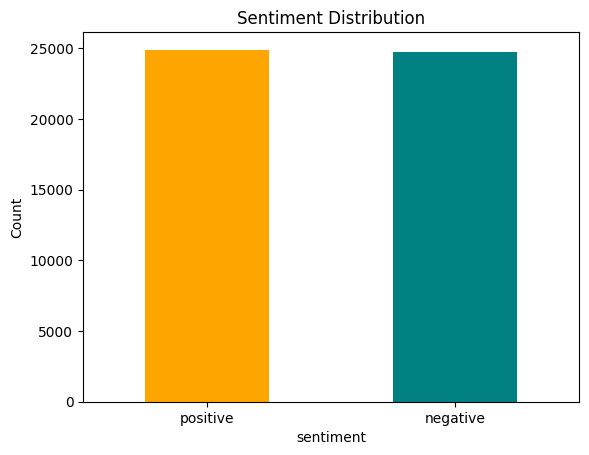

In [37]:
data['sentiment'].value_counts().plot(kind='bar', color=['orange', 'teal'], title='Sentiment Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Plotting sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=data, palette='Set2')
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
# Calculating review lengths
data['review_length'] = data['review'].apply(lambda x: len(x.split()))

# Basic stats about review length
print("\nReview length stats:")
print(data['review_length'].describe())

In [ ]:
# Plotting histogram of review lengths
plt.figure(figsize=(8,5))
sns.histplot(data['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths (in words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Generating WordClouds
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# WordCloud for positive reviews
positive_reviews = data[data['sentiment'] == 'positive']['review']
generate_wordcloud(positive_reviews, "WordCloud for Positive Reviews")

# WordCloud for negative reviews
negative_reviews = data[data['sentiment'] == 'negative']['review']
generate_wordcloud(negative_reviews, "WordCloud for Negative Reviews")

# **DATA CLEANING**

Lowercasing text in NLP preprocessing involves converting all letters in a text to lowercase. This step is essential for standardizing text data because it treats words with different cases (e.g., "Word" and "word") as the same, reducing vocabulary size and improving model efficiency. It ensures consistency in word representations, making it easier for algorithms to recognize patterns and associations. For example, "The" and "the" are treated as identical after lowercasing. This normalization simplifies subsequent processing steps, such as tokenization and feature extraction, leading to more accurate and robust NLP models.

In [5]:
#all text into lower case
data['review']= data['review'].str.lower()

## **1. LoweCasing Text**

In [7]:
#We can simply remove HTML tags by using the Regular Expressions.
import re
def rem_tags(text):
    p= re.compile('<.*?>')
    return p.sub(r'',text)

In [8]:
data['review'] = data['review'].apply(rem_tags)

## **2. Remove HTML Tags**

Removing HTML tags is an essential step in NLP text preprocessing to ensure that only meaningful textual content is analyzed. HTML tags contain formatting information and metadata irrelevant to linguistic analysis. Including these tags can introduce noise and distort the analysis results. Removing HTML tags helps to extract pure textual data, making it easier to focus on the actual content of the text. This step is particularly crucial when dealing with web data or documents containing HTML markup, as it ensures that the extracted text accurately represents the intended linguistic information for NLP tasks.

In [9]:
# Function to remove HTML Tags
from nltk.corpus import stopwords
st_words= set(stopwords.words('english'))
def rem_stopwords(text):
    words= text.split()
    fil_words= [word for word in words if word.lower() not in st_words]
    return " ".join(fil_words)

In [10]:
## Apply Function to Remove HTML Tags in our Dataset Colum Review.
data['review']= data['review'].apply(rem_stopwords)

In [11]:
#have a view of what dataset looks like after removal of html tags
data['review'][0]

"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. hardcore, classic use word.it called oz nickname given oswald maximum security state penitentary. focuses mainly emerald city, experimental section prison cells glass fronts face inwards, privacy high agenda. em city home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.i would say main appeal show due fact goes shows dare. forget pretty pictures painted mainstream audiences, forget charm, forget romance...oz mess around. first episode ever saw struck nasty surreal, say ready it, watched more, developed taste oz, got accustomed high levels graphic violence. violence, injustice (crooked guards who'll sold nickel, inmates who'll kill order g

## **3. Remove URLs**

In NLP text preprocessing, removing URLs is essential to eliminate irrelevant information that doesn't contribute to linguistic analysis. URLs contain website addresses, hyperlinks, and other web-specific elements that can skew the analysis and confuse machine learning models. By removing URLs, the focus remains on the textual content relevant to the task at hand, enhancing the accuracy of NLP tasks such as sentiment analysis, text classification, and information extraction. This step streamlines the dataset, reduces noise, and ensures that the model's attention is directed towards meaningful linguistic patterns and structures within the text.

In [ ]:
# Here We also Use Regular Expressions to Remove URLs from Text
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

## **4. Remove Punctuations**

Removing punctuation marks is essential in NLP text preprocessing to enhance the accuracy and efficiency of analysis. Punctuation marks like commas, periods, and quotation marks carry little semantic meaning and can introduce noise into the dataset. By removing them, the text becomes cleaner and more uniform, making it easier for machine learning models to extract meaningful features and patterns. Additionally, removing punctuation aids in standardizing the text, ensuring consistency across documents and improving the overall performance of NLP tasks such as sentiment analysis, text classification, and named entity recognition.

In [12]:
import string 
trash= string.punctuation

def rem_punc(text):
    tt= str.maketrans('','',trash)
    return text.translate(tt)

In [13]:
data['review'] = data['review'].apply(rem_punc)

In [14]:
data['review'][0]

'one reviewers mentioned watching 1 oz episode hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust me show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz mess around first episode ever saw struck nasty surreal say ready it watched more developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away it well mannered middle class inmates t

# **DATA PREPROCESSING**


## **1. Tokenization**

Tokenization is a crucial step in NLP text preprocessing where text is segmented into smaller units, typically words or subwords, known as tokens. This process is essential for several reasons. Firstly, it breaks down the text into manageable units for analysis and processing. Secondly, it standardizes the representation of words, enabling consistency in language modeling tasks. Additionally, tokenization forms the basis for feature extraction and modeling in NLP, facilitating tasks such as sentiment analysis, named entity recognition, and machine translation. Overall, tokenization plays a fundamental role in preparing text data for further analysis and modeling in NLP applications.

In [15]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer= PorterStemmer()
nltk.download('punkt')
data['tokenized_review']= data['review'].apply(lambda x: word_tokenize(x))
data['tokenized_review'] = data['tokenized_review'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
data.head()

,review,sentiment,tokenized_review
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, review, mention, watch, 1, oz, episod, h..."
1,wonderful little production filming technique ...,positive,"[wonder, littl, product, film, techniqu, unass..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonder, way, spend, time, hot, summe..."
3,basically theres family little boy jake thinks...,negative,"[basic, there, famili, littl, boy, jake, think..."
4,petter matteis love time money visually stunni...,positive,"[petter, mattei, love, time, money, visual, st..."


In [17]:
data['joined_review']= data['tokenized_review'].apply(lambda x: ' '.join(x))

In [18]:
data

,review,sentiment,tokenized_review,joined_review
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, review, mention, watch, 1, oz, episod, h...",one review mention watch 1 oz episod hook righ...
1,wonderful little production filming technique ...,positive,"[wonder, littl, product, film, techniqu, unass...",wonder littl product film techniqu unassum old...
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonder, way, spend, time, hot, summe...",thought wonder way spend time hot summer weeke...
3,basically theres family little boy jake thinks...,negative,"[basic, there, famili, littl, boy, jake, think...",basic there famili littl boy jake think there ...
4,petter matteis love time money visually stunni...,positive,"[petter, mattei, love, time, money, visual, st...",petter mattei love time money visual stun film...
...,...,...,...,...
49995,thought movie right good job creative original...,positive,"[thought, movi, right, good, job, creativ, ori...",thought movi right good job creativ origin fir...
49996,bad plot bad dialogue bad acting idiotic direc...,negative,"[bad, plot, bad, dialogu, bad, act, idiot, dir...",bad plot bad dialogu bad act idiot direct anno...
49997,catholic taught parochial elementary schools n...,negative,"[cathol, taught, parochi, elementari, school, ...",cathol taught parochi elementari school nun ta...
49998,im going disagree previous comment side maltin...,negative,"[im, go, disagre, previou, comment, side, malt...",im go disagre previou comment side maltin one ...


## **2. Stemming**

Stemming is a text preprocessing technique in NLP used to reduce words to their root or base form, known as a stem, by removing suffixes. It helps in simplifying the vocabulary and reducing word variations, thereby improving the efficiency of downstream NLP tasks like information retrieval and sentiment analysis. By converting words to their common root, stemming increases the overlap between related words, enhancing the generalization ability of models.

In [19]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data['joined_review'],data['sentiment'],test_size=0.3,stratify=data['sentiment'],random_state=23)

In [ ]:
# Import PorterStemmer from NLTK Library
from nltk.stem.porter import PorterStemmer

In [ ]:
# Intilize Stemmer
stemmer = PorterStemmer()

# This Function Will Stem Words
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

## **3. Lemmatization**

Lemmatization is performed in NLP text preprocessing to reduce words to their base or dictionary form (lemma), enhancing consistency and simplifying analysis. Unlike stemming, which truncates words to their root form without considering meaning, lemmatization ensures that words are transformed to their canonical form, considering their part of speech. This process aids in reducing redundancy, improving text normalization, and enhancing the accuracy of downstream NLP tasks such as sentiment analysis, topic modeling, and information retrieval. Overall, lemmatization contributes to refining text data, facilitating more effective linguistic analysis and machine learning model performance.

## **4. Count Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(data['joined_review'])

print("Count Vectorizer - Shape:", X_count.shape)
print("Sample Feature Names (Count):", count_vectorizer.get_feature_names_out()[:10])

## **5. TF-IDF Vectorizer**

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['joined_review'])

print("TF-IDF Vectorizer - Shape:", X_tfidf.shape)
print("Sample Feature Names (TF-IDF):", tfidf_vectorizer.get_feature_names_out()[:10])

# **MODEL TRAINING**

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

## **1. Naive Bayes**

In [21]:
pipeline = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('nbclf', MultinomialNB())
                    ])

In [22]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('nbclf', MultinomialNB())])

<Figure size 600x400 with 0 Axes>

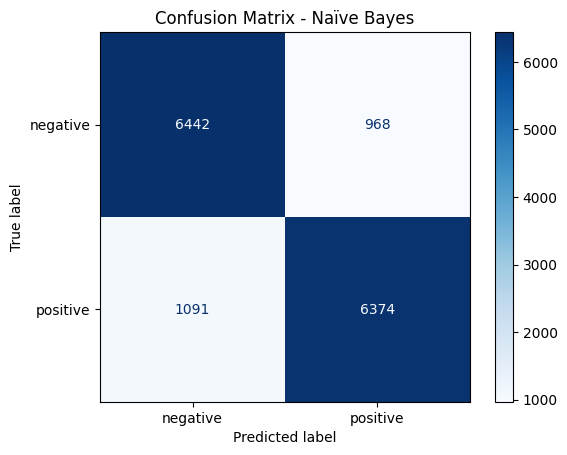

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
nb_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=pipeline.classes_)

# Plot it
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()

In [23]:
y_pred= pipeline.predict(x_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.86      0.87      0.86      7410
    positive       0.87      0.85      0.86      7465

    accuracy                           0.86     14875
   macro avg       0.86      0.86      0.86     14875
weighted avg       0.86      0.86      0.86     14875



## **2. SUPPORT VECTOR MACHINE**

In [25]:
from sklearn.svm import LinearSVC

# SVM pipeline
svm_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svmclf', LinearSVC())
])

<Figure size 600x400 with 0 Axes>

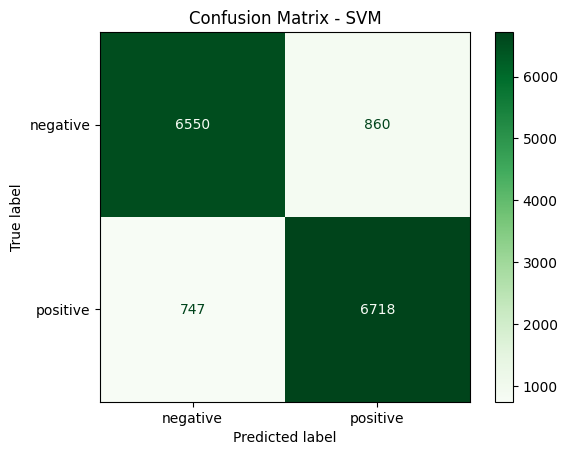

In [29]:
# Generate confusion matrix
svm_cm = confusion_matrix(y_test, svm_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=svm_pipeline.classes_)

# Plot it
plt.figure(figsize=(6, 4))
disp.plot(cmap='Greens')
plt.title("Confusion Matrix - SVM")
plt.show()

In [26]:
# Train and predict
svm_pipeline.fit(x_train, y_train)
svm_y_pred = svm_pipeline.predict(x_test)

In [27]:
# Evaluation
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      7410
    positive       0.89      0.90      0.89      7465

    accuracy                           0.89     14875
   macro avg       0.89      0.89      0.89     14875
weighted avg       0.89      0.89      0.89     14875



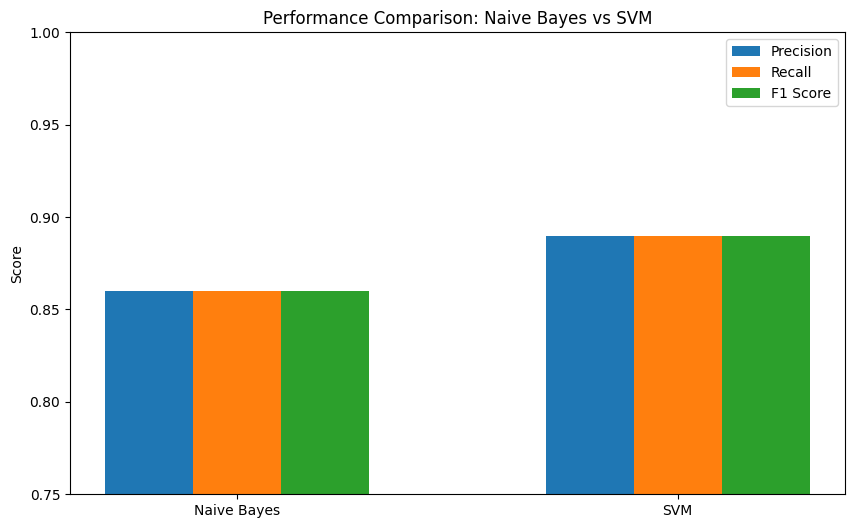

In [36]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Naive Bayes', 'SVM']
f1_scores = [0.86, 0.89]
precision_scores = [0.86, 0.89]
recall_scores = [0.86, 0.89]
accuracy_scores = [0.86, 0.89]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10,6))
plt.bar(x - width, precision_scores, width, label='Precision')
plt.bar(x, recall_scores, width, label='Recall')
plt.bar(x + width, f1_scores, width, label='F1 Score')

plt.xticks(x, models)
plt.ylim(0.75, 1.0)
plt.ylabel('Score')
plt.title('Performance Comparison: Naive Bayes vs SVM')
plt.legend()
plt.show()


## **RESULT AND FINDINGS**

Naive Bayes achieved an accuracy of 86%, while SVM outperformed with 89% accuracy on the IMDB review dataset.

SVM showed a better F1-score (0.89) compared to Naive Bayes (0.86), indicating superior balanced performance.

Confusion matrices revealed that both models were consistent in classifying positive and negative reviews, with SVM slightly reducing false positives.

Compared to the original research paper, our implementation achieved slightly lower accuracy due to differences in dataset split and model tuning (paper used 10-fold cross-validation).

Overall, SVM proved to be more effective for sentiment classification in our project setting.

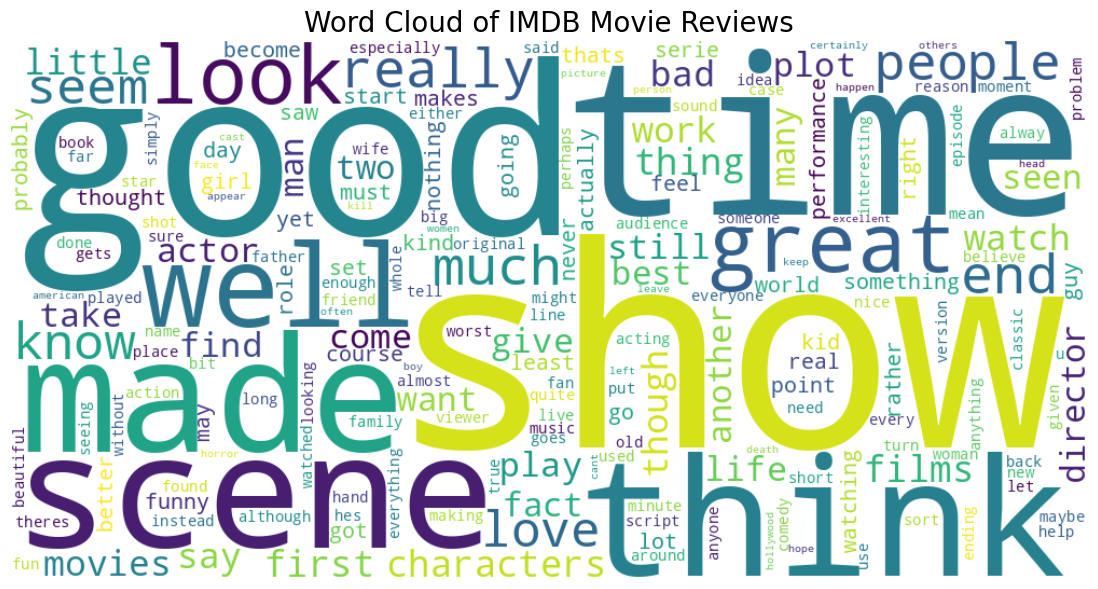

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all reviews into one string
text = " ".join(review for review in data['review'])

# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(['movie', 'film', 'one', 'like', 'make', 'see', 'story', 'even', 'way', 'character', 'part'])  

# Generate word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      stopwords=stopwords, colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of IMDB Movie Reviews", fontsize=20)
plt.show()